# Preamble

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# general
import re
import collections
import pickle
import warnings 
import joblib
import pathlib

# data
import numpy as np
import pandas as pd

# ml / stats
import sklearn
import statsmodels.stats.multitest
import scipy.stats

# plotting
import seaborn as sns
import matplotlib.pyplot as plt


# init matplotlib defaults
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

In [2]:
import sklearn.manifold
import sklearn.impute
import sklearn.pipeline

# Sub figures 

In [3]:
np.random.seed(42)
path = pathlib.Path("../_out/figures/figure1")
path.mkdir(parents=True, exist_ok=True)

In [4]:
import seaborn as sns

In [5]:
import corals.correlation.utils

In [6]:
a = np.random.random((3,30)) - 0.5
b = np.random.random((3,30)) - 0.5

In [7]:
colors = sns.color_palette(n_colors=a.shape[1])

In [8]:
x1 = np.array([0.05, 0.15, 0])
y1 = np.array([0.5, 0.4, 0])

x2 = np.array([0.3, 0.3,0])
# x2 = np.array([0.05, 0.15, 0])
y2 = np.array([0.4, -0.2, 0]) * 0.7

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


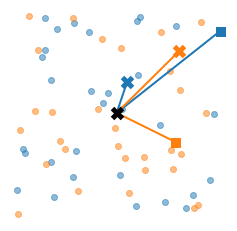

In [9]:
fig, ax = plt.subplots(1,1, figsize=(4,4))

ax.scatter(a[0,:],a[1,:], c=colors[0], alpha=0.5)
ax.scatter(b[0,:],b[1,:], c=colors[1], alpha=0.5)

ax.plot([0,x1[0]], [0,x1[1]], c=colors[0], linestyle="-", linewidth=2)
ax.plot([0,y1[0]], [0,y1[1]], c=colors[0], linestyle="-", linewidth=2)
ax.plot([x1[0]], [x1[1]], c=colors[0], marker="x", mew=5, ms=10)
ax.plot([y1[0]], [y1[1]], c=colors[0], marker="s", mew=5, ms=5)

ax.plot([0,x2[0]], [0,x2[1]], c=colors[1], linestyle="-", linewidth=2)
ax.plot([0,y2[0]], [0,y2[1]], c=colors[1], linestyle="-", linewidth=2)
ax.plot([x2[0]], [x2[1]], c=colors[1], marker="x", mew=5, ms=10)
ax.plot([y2[0]], [y2[1]], c=colors[1], marker="s", mew=5, ms=5)

ax.plot([0], [0], marker="x", mew=5, ms=10, c="black")
ax.axis("off")

fig.savefig(path / "fig1_features.svg")
pass

In [10]:
ap = corals.correlation.utils.preprocess_X(a)
bp = corals.correlation.utils.preprocess_X(b)

In [11]:
x1p = corals.correlation.utils.preprocess_X(x1.reshape(-1,1)).flatten()
y1p = corals.correlation.utils.preprocess_X(y1.reshape(-1,1)).flatten()

x2p = corals.correlation.utils.preprocess_X(x2.reshape(-1,1)).flatten()
y2p = corals.correlation.utils.preprocess_X(y2.reshape(-1,1)).flatten()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


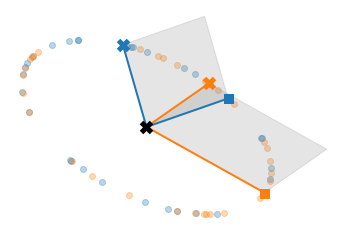

In [12]:
fig, ax = plt.subplots(1,1)

ax.scatter(ap[0,:],ap[1,:], c=colors[0], alpha=0.3)
ax.scatter(bp[0,:],bp[1,:], c=colors[1], alpha=0.3)

ax.plot([0,x1p[0]], [0,x1p[1]], c=colors[0], linestyle="-", linewidth=2)
ax.plot([0,y1p[0]], [0,y1p[1]], c=colors[0], linestyle="-", linewidth=2)
ax.plot([x1p[0]], [x1p[1]], c=colors[0], marker="x", mew=5, ms=10)
ax.plot([y1p[0]], [y1p[1]], c=colors[0], marker="s", mew=5, ms=5)

ax.plot([0,x2p[0]], [0,x2p[1]], c=colors[1], linestyle="-", linewidth=2)
ax.plot([0,y2p[0]], [0,y2p[1]], c=colors[1], linestyle="-", linewidth=2)
ax.plot([x2p[0]], [x2p[1]], c=colors[1], marker="x", mew=5, ms=10)
ax.plot([y2p[0]], [y2p[1]], c=colors[1], marker="s", mew=5, ms=5)

ax.plot([0], [0], marker="x", mew=5, ms=10, c="black")
ax.axis("off")

ax.fill(
    [0,x1p[0],x1p[0]+y1p[0],y1p[0]],
    [0,x1p[1],x1p[1]+y1p[1],y1p[1]],
    color="grey",
    alpha=0.2
)

ax.fill(
    [0,x2p[0],x2p[0]+y2p[0],y2p[0]],
    [0,x2p[1],x2p[1]+y2p[1],y2p[1]],
    color="grey",
    alpha=0.2
)

fig.savefig(path / "fig1_cor-space.svg")


pass

In [13]:
ab = np.concatenate([ap,bp], axis=0)
abn = np.concatenate([ap,-bp], axis=0)

In [14]:
x12 = np.concatenate([x1,x2])
y12 = np.concatenate([y1,-y2])

In [15]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [16]:
def format_ax(ax):
    
    ax.w_xaxis.pane.set_color('w');
    ax.w_yaxis.pane.set_color('w');
    ax.w_zaxis.pane.set_color('w');

    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    for line in ax.xaxis.get_ticklines():
        line.set_color((1.0, 1.0, 1.0, 0.0))
    for line in ax.yaxis.get_ticklines():
        line.set_color((1.0, 1.0, 1.0, 0.0))
    for line in ax.zaxis.get_ticklines():
        line.set_color((1.0, 1.0, 1.0, 0.0))


    ax.xaxis._axinfo["grid"]['color'] = (0, 0, 0, .1)
    ax.yaxis._axinfo["grid"]['color'] = (0, 0, 0, .1)
    ax.zaxis._axinfo["grid"]['color'] = (0, 0, 0, .1)

/home/mgbckr/miniconda3/envs/nalab-fastcor-test/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mgbckr/miniconda3/envs/nalab-fastcor-test/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


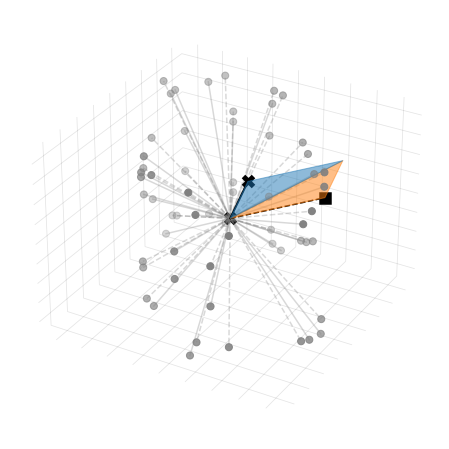

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0], [0], [0], marker="x", mew=5, ms=10, c="black")

c1, c2, c3 = 0,1,4
# c1, c2, c3 = 0,4,3

ax.scatter(ab[c1,:],ab[c2,:],ab[c3,:], c="grey",s=50)
for i in range(ab.shape[1]):
    ax.plot([0,ab[c1,i]],[0,ab[c2,i]],[0,ab[c3,i]], c="grey", alpha=0.3)
    
ax.scatter(abn[c1,:],abn[c2,:],abn[c3,:], c="grey",s=50)
for i in range(abn.shape[1]):
    ax.plot([0,abn[c1,i]],[0,abn[c2,i]],[0,abn[c3,i]], c="grey", alpha=0.3, linestyle="--")

ax.plot([x12[c1]],[x12[c2]],[x12[c3]], c="black", marker="x", mew=5, ms=10)
ax.plot([0, x12[c1]],[0,x12[c2]],[0,x12[c3]], c="black", linewidth=2)

ax.plot([y12[c1]],[y12[c2]],[y12[c3]], c="black", marker="s", mew=2.5, ms=10)
ax.plot([0, y12[c1]],[0,y12[c2]],[0,y12[c3]], c="black", linestyle="--")

X=np.array([0, x12[c1], x12[c1] + y12[c1]]) 
Y=np.array([0, x12[c2], x12[c2] + y12[c2]])
Z=np.array([0, x12[c3], x12[c3] + y12[c3]])
verts = list(zip(X,Y,Z))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.5, color=colors[0]), zs=Z)

X=np.array([0, y12[c1], x12[c1] + y12[c1]]) 
Y=np.array([0, y12[c2], x12[c2] + y12[c2]])
Z=np.array([0, y12[c3], x12[c3] + y12[c3]])
verts = list(zip(X,Y,Z))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.5, color=colors[1]), zs=Z)
    
format_ax(ax)
# ax.axis("off")

fig.savefig(path / "fig1_cor-space-diff.svg")

In [18]:
import sklearn.manifold

print("tsne")
tsne = sklearn.manifold.TSNE(n_components=2, perplexity=5, random_state=45)
e = tsne.fit_transform(ap.transpose())

print("corr")
c = ap.transpose() @ ap


tsne
corr


edges
points


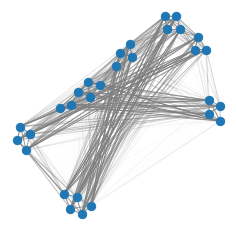

In [19]:
fig, ax = plt.subplots(1,1, figsize=(4,4))

print("edges")
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        if i < j:
            cc = (np.abs(c[i,j]) + 1) / 2
            ax.plot([e[i,0], e[j,0]], [e[i,1], e[j,1]], linewidth=cc, c="grey", alpha=cc**10)

print("points")
ax.scatter(e[:,0], e[:,1], zorder=100, s=70)
ax.axis("off")
fig.savefig(path / "fig1_network_a.svg")
            
pass

corr
edges
points


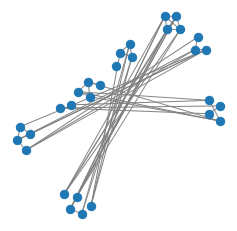

In [22]:
print("corr")
from corals.correlation.topk.baselines import topk_full_corrcoef as topk_matrix 

ctop, idx = topk_matrix(a,k=a.shape[1]**2 * 0.15)


fig, ax = plt.subplots(1,1, figsize=(4,4))

print("edges")
for cor,(i,j) in zip(*[ctop,zip(*idx)]):
#     print(cor, i, j)
    if i < j:
        cc = (np.abs(cor) + 1) / 2
        ax.plot([e[i,0], e[j,0]], [e[i,1], e[j,1]], linewidth=cc, c="grey", alpha=cc**10)

print("points")
ax.scatter(e[:,0], e[:,1], zorder=100, s=70)
ax.axis("off")
    
fig.savefig(path / "fig1_network_a_topk.svg")
    
pass

corr
edges
points


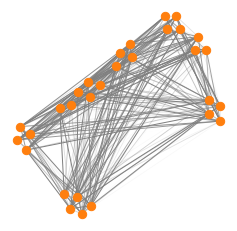

In [23]:
print("corr")
c2 = bp.transpose() @ bp

fig, ax = plt.subplots(1,1, figsize=(4,4))

print("edges")
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        if i < j:
            cc = (np.abs(c2[i,j]) + 1) / 2
            ax.plot([e[i,0], e[j,0]], [e[i,1], e[j,1]], linewidth=cc, c="grey", alpha=cc**10)

print("points")
ax.scatter(e[:,0], e[:,1], zorder=100, s=70, color=colors[1])
ax.axis("off")
            

fig.savefig(path / "fig1_network_b.svg")
    
pass

corr
sorting (900,)
edges
points


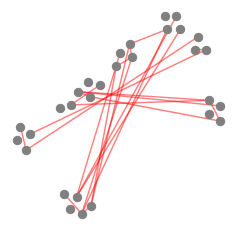

In [26]:
print("corr")
from corals.correlation.topkdiff.original import topkdiff_matrix 

cdiff, idx = topkdiff_matrix(a,b,k=a.shape[1]**2 * 0.05)


fig, ax = plt.subplots(1,1, figsize=(4,4))

print("edges")
for cor,(i,j) in zip(*[cdiff,zip(*idx)]):
#     print(cor, i, j)
    if i < j:
        cc = (np.abs(cor) + 1) / 2
        ax.plot([e[i,0], e[j,0]], [e[i,1], e[j,1]], linewidth=cc, c="red", alpha=0.5)
#         ax.plot([e[i,0], e[j,0]], [e[i,1], e[j,1]], linewidth=cc, c="red", alpha=cc**10)

print("points")
ax.scatter(e[:,0], e[:,1], zorder=100, s=70, c="grey")
ax.axis("off")

fig.savefig(path / "fig1_network_diff.svg")

pass